In [1]:
import os
import hist
from coffea import util
import numpy as np
import itertools
import mplhep as hep

In [2]:
def ConvertLabelToInt(mapping, str_label):
    for intkey, string in mapping.items():
        if str_label == string:
            return intkey

In [3]:
dir1 = 'CoffeaOutputs/UnweightedOutputs/'
dir2 = 'CoffeaOutputsForCombine/Coffea_FirstRun/'

btagdir = 'MediumBTag/'
yeardir = '2016/'
apvdir = 'noAPV/'
letter = 'F' # Era

In [4]:
JetHT2016_unweighted = util.load(dir2+'JetHT/'+btagdir+yeardir+apvdir+'TTbarRes_0l_UL16postVFP_JetHT'+letter+'_Data.coffea')
TTbar_unweighted = util.load(dir2+'TT/'+btagdir+yeardir+apvdir+'TTbarRes_0l_UL16postVFP_TTbar.coffea')

In [5]:
Datasets = {
    'JetHT2016': JetHT2016_unweighted
}

In [6]:
for dataset,output in Datasets.items():
    print("-------" + dataset + " Cutflow--------")
    for i,j in output['cutflow'].items():        
        print( '%20s : %20s' % (i,j) )

-------JetHT2016 Cutflow--------
          all events :              6613811
                sumw :            6613811.0
               sumw2 :            6613811.0
      Passed Trigger :              1582505
       Passed HT Cut :              1024476
 Passed Loose Jet ID :              1018267
     Passed pT,y Cut :               822225
         >= oneTTbar :               476448
     Passed dPhi Cut :               237694
        Good Subjets :               232109
          AT&Pt0bcen :                  460
          AT&Pt0bfwd :                  520
          AT&Pt1bcen :                  179
          AT&Pt1bfwd :                  189
          AT&Pt2bcen :                   25
          AT&Pt2bfwd :                   20
             at0bcen :                13284
             at0bfwd :                14069
             at1bcen :                 3504
             at1bfwd :                 3500
             at2bcen :                  283
             at2bfwd :                  217

In [7]:
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import warnings
import re # regular expressions
warnings.filterwarnings("ignore")

# ---- Reiterate categories ---- #
ttagcats = ["AT&Pt", "at", "pret", ">=0t", "0t", ">=1t", "1t", "2t"]
btagcats = ["0b", "1b", "2b"]
ycats = ['cen', 'fwd']

list_of_bcats = [ b+y for b,y in itertools.product( btagcats, ycats) ]
list_of_cats = [ t+b+y for t,b,y in itertools.product( ttagcats, btagcats, ycats) ]
label_dict = {i: label for i, label in enumerate(list_of_cats)}

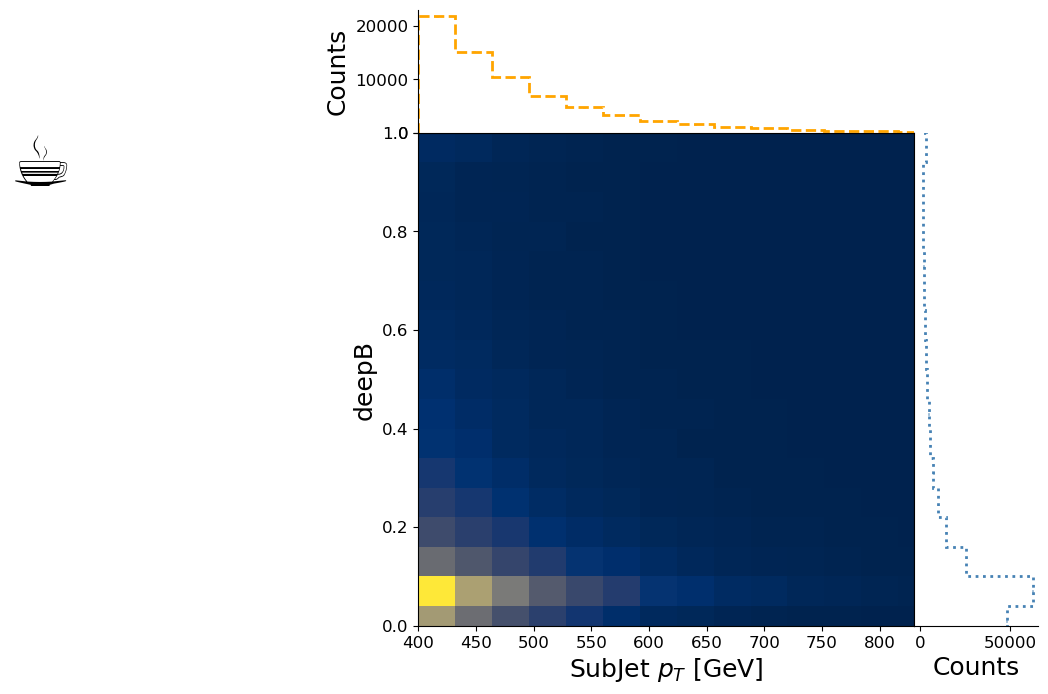

In [20]:
# plt.rcParams.update({
#     'font.size': 14,
#     'axes.titlesize': 18,
#     'axes.labelsize': 18,
#     'xtick.labelsize': 12,
#     'ytick.labelsize': 12
#     })

plt.figure(figsize=(8, 8))

# -- (dataset_axis, subjetmass_axis, subjetpt_axis, subjeteta_axis, subjetphi_axis, subjettagger_axis) -- #
TaggerInfo = JetHT2016_unweighted['deepB'][f'UL16postVFP_JetHT{letter}_Data', sum, :, sum, sum, :]

TaggerInfo.plot2d_full(
    main_cmap="cividis",
    top_ls="--",
    top_color="orange",
    top_lw=2,
    side_ls=":",
    side_lw=2,
    side_color="steelblue",
)

plt.xlim(400,830)
plt.ylim(0,1.0)

coffea = plt.text(100.0, 1.0, u"☕",
          fontsize=50,
          horizontalalignment='right',
          verticalalignment='top'
         )
# Era = plt.text(1.0, 1.0, f'Era: {letter}',
#         fontsize='small',
#         horizontalalignment='right',
#         verticalalignment='top'
#         # transform=ax.transAxes
#        )

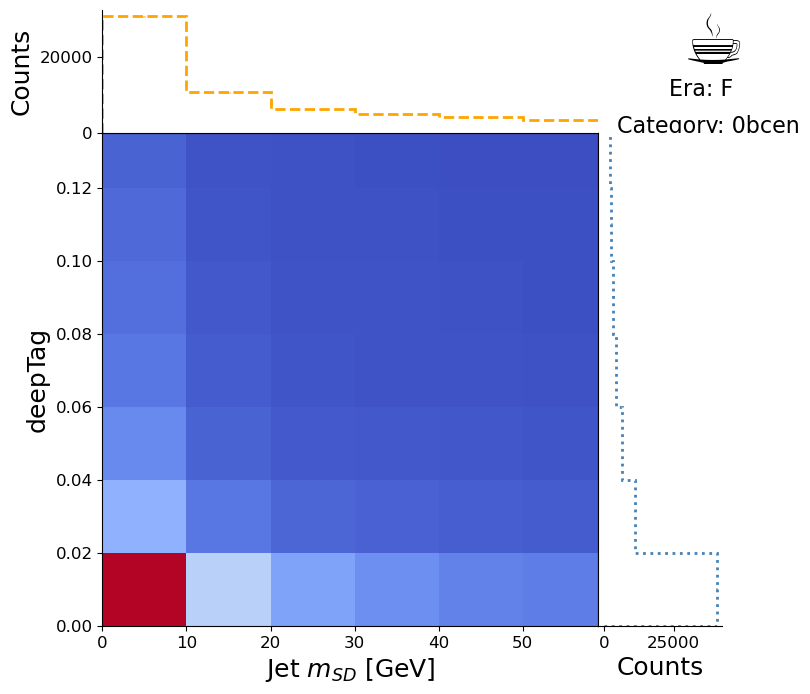

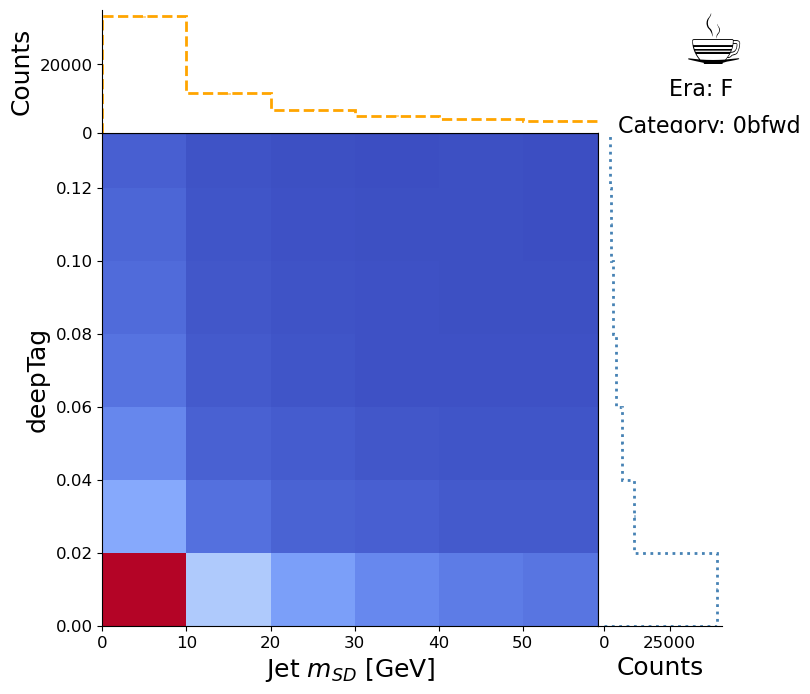

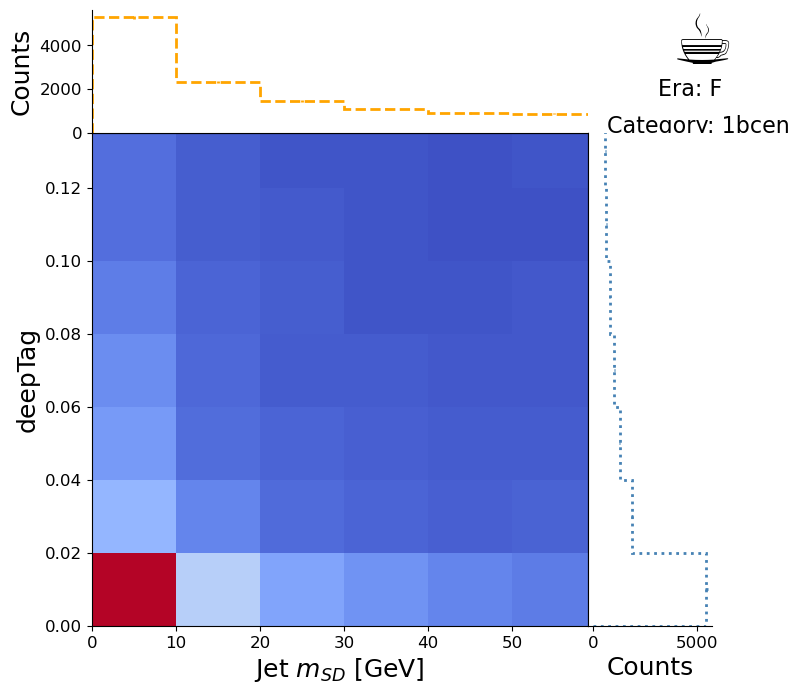

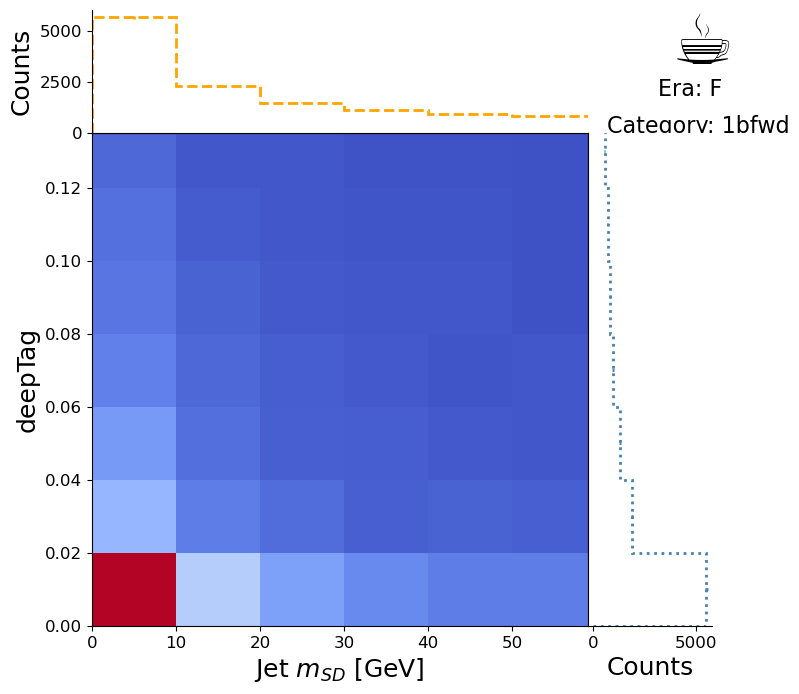

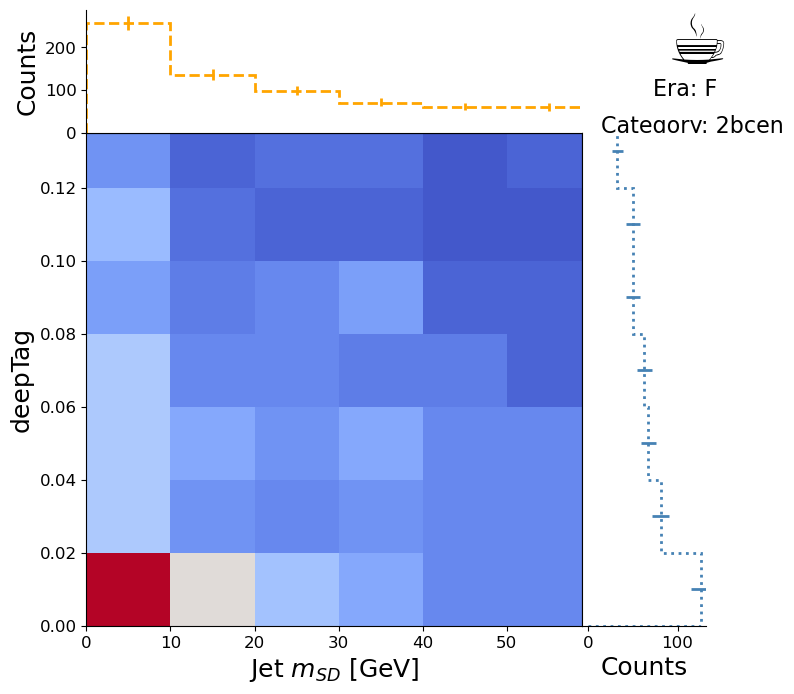

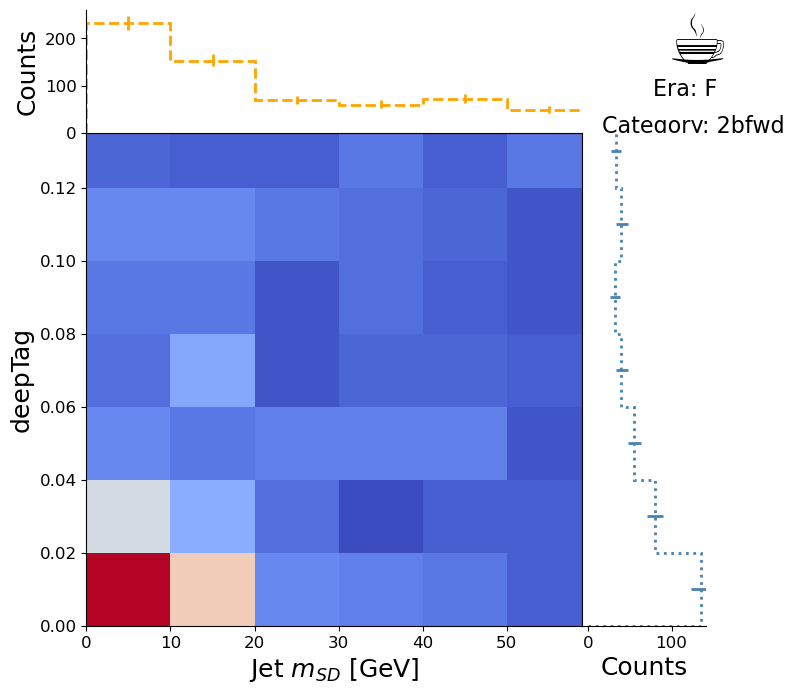

In [9]:
for b_y in list_of_bcats:
    plt.rcParams.update({
        'font.size': 14,
        'axes.titlesize': 18,
        'axes.labelsize': 18,
        'xtick.labelsize': 12,
        'ytick.labelsize': 12
        })
    # fig, (ax, bx, cx) = plt.subplots(
    #     nrows=1,
    #     ncols=3,
    #     figsize=(8,8),
    #     sharex=True
    # )
    # fig.subplots_adjust(hspace=.07)
    plt.figure(figsize=(8, 8))
    # plt.title(f'Category: {b_y}', loc='right', )
    # -- dataset_axis, cats_axis, jetpt_axis, jetmass_axis, tagger_axis -- #

    TaggerInfoMass = JetHT2016_unweighted['deepTagMD_TvsQCD'][f'UL16postVFP_JetHT{letter}_Data', ConvertLabelToInt(label_dict, '2t'+b_y), sum, :, :]
    # TaggerInfoMass = TTbar_unweighted['deepTagMD_TvsQCD']['UL16postVFP_TTbar', ConvertLabelToInt(label_dict, '2t'+b_y), sum, :, :]
    
    TaggerInfoMass.plot2d_full(
        main_cmap="coolwarm",
        top_ls="--",
        top_color="orange",
        top_lw=2,
        side_ls=":",
        side_lw=2,
        side_color="steelblue",
    )
    
    
    coffea = plt.text(69.00, 0.15, u"☕",
              fontsize=50,
              horizontalalignment='left',
              verticalalignment='bottom'
              # transform=ax.transAxes
             )
    Era = plt.text(75.00, 0.15, f'Era: {letter}',
            fontsize=16,
            horizontalalignment='right',
            verticalalignment='top'
            # transform=ax.transAxes
           )
    Category = plt.text(83.00, 0.14, f'Category: {b_y}',
            fontsize=16,
            horizontalalignment='right',
            verticalalignment='top'
            # transform=ax.transAxes
           )
    
    plt.xlim(0,59)
    plt.ylim(0,0.135)
    
    plt.show()